<a href="https://colab.research.google.com/github/wwillis125/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/LS_DS_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [3]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself


import pandas as pd

persons = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv'

df = pd.read_csv(persons)

print(df.shape)
df.head()


(1200, 4)


,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [23]:
# pd.crosstab(df['weight'], df['age'])

crosstab_wa = pd.crosstab(df['weight'], df['age'])

crosstab_wa.head()

age,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80
weight,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,2,0
101,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
102,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
103,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
104,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0


In [24]:
# !pip install pandas==0.23.4

weight_bins = pd.cut(df['weight'], 7)

age_bins = pd.cut(df['age'], 4)

# pd.crosstab(weight_bins, age_bins)

crosstab_w = pd.crosstab(weight_bins, [df['age'], df['exercise_time']])

crosstab_w.head()

age                 18                         ...  80                        
exercise_time      9   31  63  79  85  104 119 ... 48  51  55  61  67  69  87 
weight                                         ...                            
(99.854, 120.857]    0   0   0   0   0   1   0 ...   0   0   0   0   0   0   0
(120.857, 141.714]   0   1   1   1   0   0   0 ...   1   1   0   0   0   0   0
(141.714, 162.571]   0   0   0   0   1   0   1 ...   0   0   0   0   0   0   0
(162.571, 183.429]   0   0   0   0   0   0   0 ...   0   0   0   1   0   1   1
(183.429, 204.286]   1   0   0   0   0   0   1 ...   0   0   0   0   0   0   1

[5 rows x 1154 columns]

In [11]:
pd.crosstab(weight_bins, [age_bins, df['exercise_time']])

age                (17.938, 33.5]                 ... (64.5, 80.0]                
exercise_time                 0   2   3   6   7   ...          214 219 220 234 245
weight                                            ...                             
(99.854, 120.857]               0   0   0   0   0 ...            0   0   0   1   0
(120.857, 141.714]              0   0   0   0   1 ...            1   1   1   0   1
(141.714, 162.571]              0   0   0   0   0 ...            0   0   0   0   0
(162.571, 183.429]              1   0   1   0   0 ...            0   0   0   0   0
(183.429, 204.286]              0   0   0   1   0 ...            0   0   0   0   0
(204.286, 225.143]              1   0   0   0   0 ...            0   0   0   0   0
(225.143, 246.0]                0   1   1   1   0 ...            0   0   0   0   0

[7 rows x 718 columns]

In [15]:
exercise_bins = pd.cut(df['exercise_time'], 5)

pd.crosstab(weight_bins, [age_bins, exercise_bins])

age                (17.938, 33.5]      ...         (64.5, 80.0]
exercise_time        (-0.3, 60.0]      ...       (240.0, 300.0]
weight                                 ...                     
(99.854, 120.857]               9      ...                    0
(120.857, 141.714]              6      ...                    1
(141.714, 162.571]              7      ...                    0
(162.571, 183.429]             10      ...                    0
(183.429, 204.286]             10      ...                    0
(204.286, 225.143]             16      ...                    0
(225.143, 246.0]                6      ...                    0

[7 rows x 20 columns]

In [0]:
crosstab_wvae = pd.crosstab(weight_bins, [age_bins, exercise_bins])

crosstab_wva = pd.crosstab(weight_bins, age_bins)
crosstab_avwe = pd.crosstab(age_bins, [weight_bins, exercise_bins])
crosstab_ave = pd.crosstab(age_bins, exercise_bins)
crosstab_evw = pd.crosstab(exercise_bins, weight_bins)
crosstab_e_vw = pd.crosstab(df['exercise_time'], weight_bins)
crosstab_a_vw = pd.crosstab(df['age'], weight_bins)
crosstab_avw = pd.crosstab(age_bins, weight_bins)

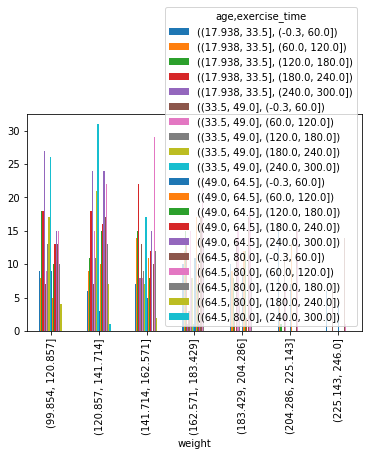

In [21]:
crosstab_wvae.plot(kind='bar')

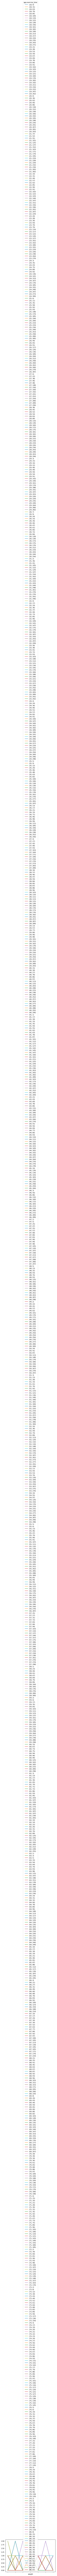

In [31]:
crosstab_w.plot(kind='line')

In [52]:
crosstab_wvae.plot.scatter(x=df['age'], y=weight_bins)

TypeError: ignored

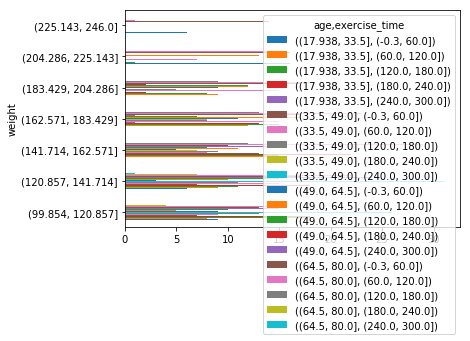

In [20]:
crosstab_wvae.plot(kind='barh')

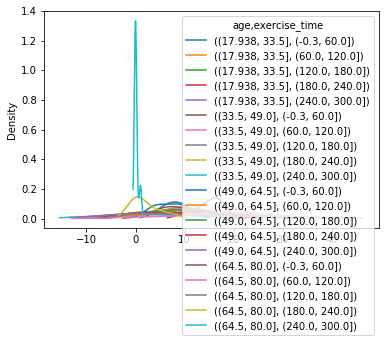

In [18]:
crosstab_wvae.plot.density()

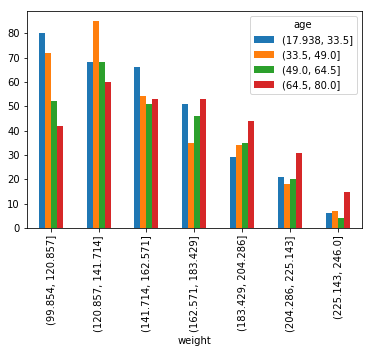

In [70]:
crosstab_wva.plot(kind='bar')

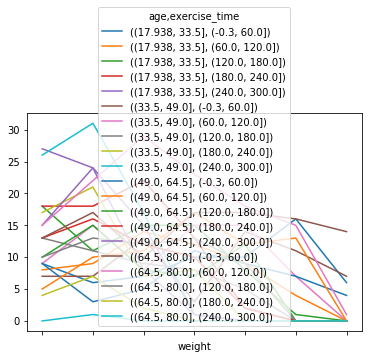

In [72]:
crosstab_wvae.plot(kind='line')

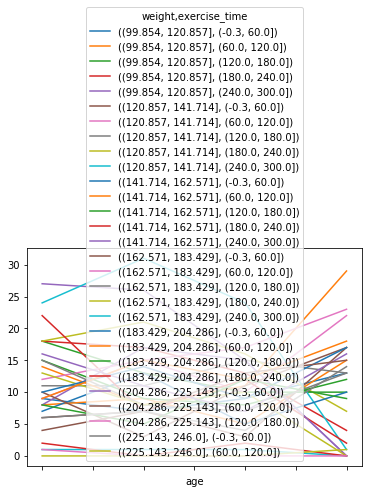

In [74]:
crosstab_avwe.plot(kind='line')

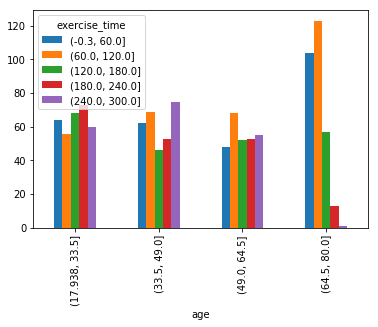

In [75]:
crosstab_ave.plot(kind='bar')

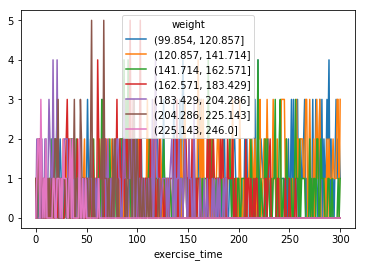

In [77]:
crosstab_e_vw.plot(kind='line')

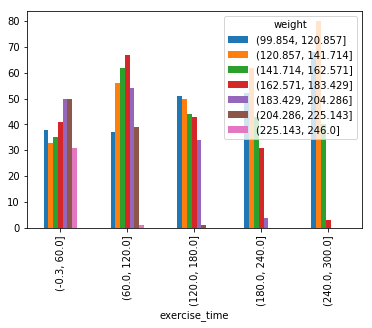

In [78]:
crosstab_evw.plot(kind='bar')

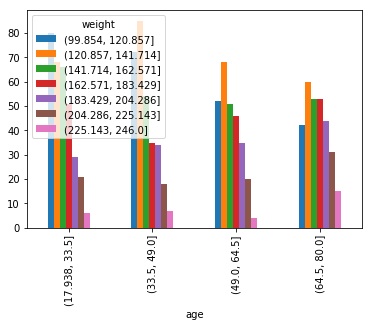

In [79]:
crosstab_avw.plot(kind='bar')

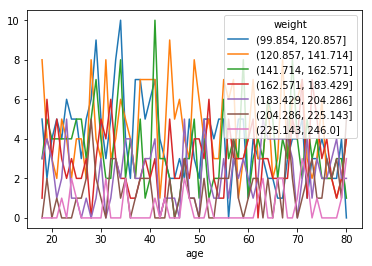

In [81]:
crosstab_a_vw.plot(kind='line')

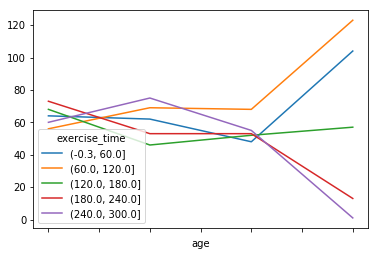

In [83]:
crosstab_ave.plot(kind='line')

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
      
      *Independant variables: age, exercise time*
      
      *Dependant variable: weight*

2.  What are the relationships between the variables?

    *As age increased, weight was more likely to increase*
    
    *As exercise time increased, weight was more likely to decrease*
    
    
3.  Which relationships are "real", and which spurious?
    
    I am not convinced that any of these relationships are completely "real", or, while they may be, other dependant factors ommitted from the data are influencing the results in order not to get a cohesive picture. Factors like diet, intensity of exercise, general health, or other lifestyle choices may be playing a part in the data and their abscence is causing a lack of cohesiveness in the results. For many of these graphs the lack of consistency and sometimes complete disregard for logic suggests that there is either no concrete correlation or that an important factor is absent from the data.


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)